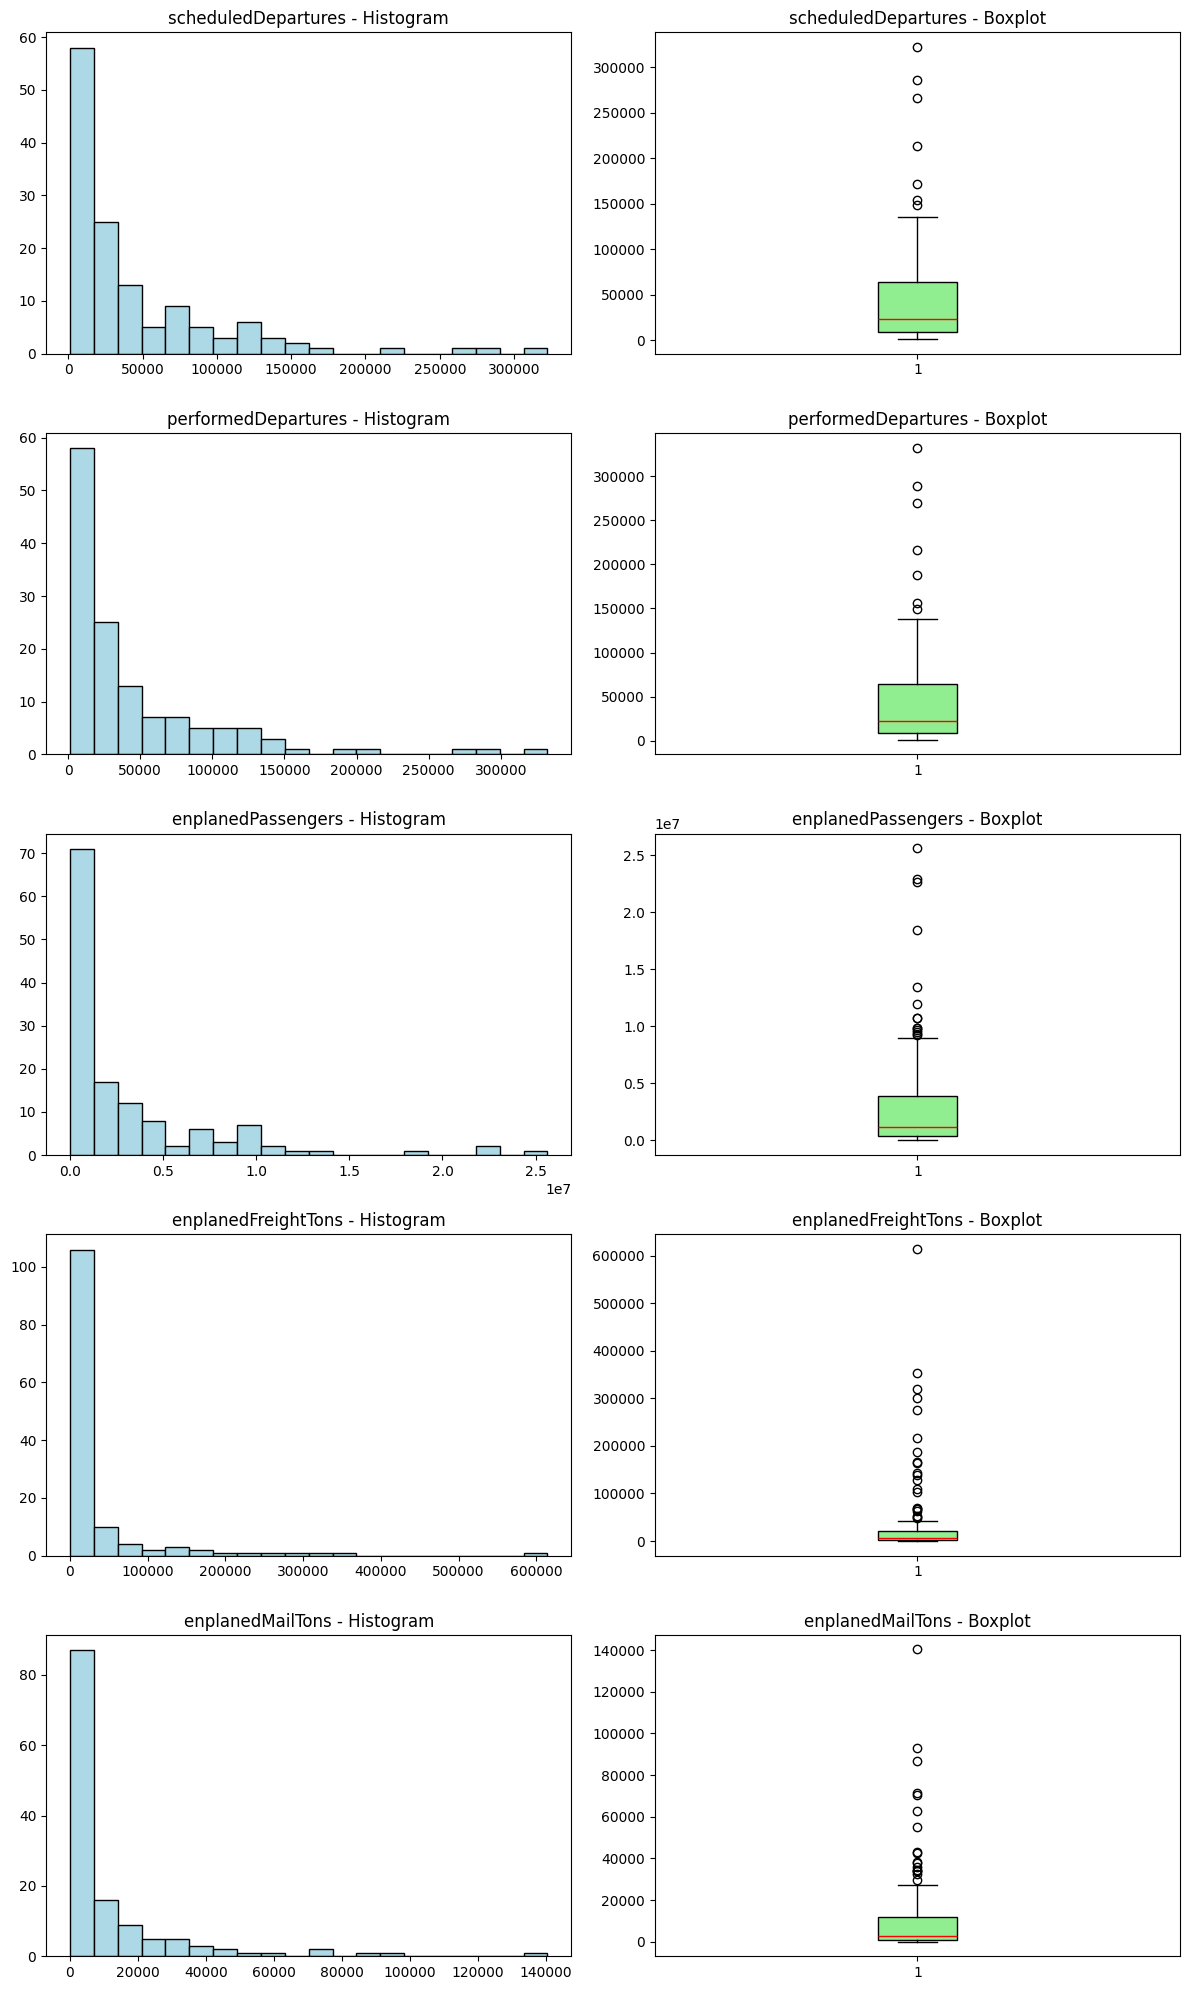

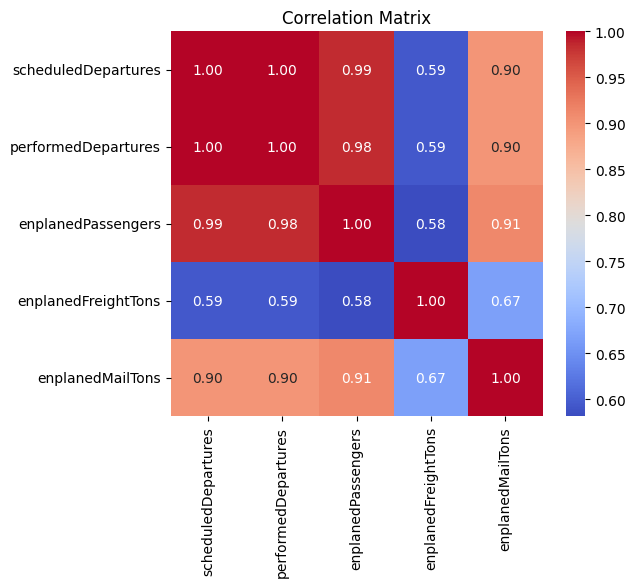

=== Descriptive Statistics ===


,mean,variance,sd,median,q1,q3
scheduledDepartures,4.556243e+04,3.202941e+09,5.659453e+04,22864.500,9049.0000,6.364375e+04
performedDepartures,4.630496e+04,3.331109e+09,5.771576e+04,23027.500,9195.0000,6.419675e+04
enplanedPassengers,3.136192e+06,2.120272e+13,4.604642e+06,1210722.000,424246.7500,3.865530e+06
enplanedFreightTons,3.385816e+04,6.575905e+09,8.109195e+04,6195.270,1540.1350,2.055892e+04
enplanedMailTons,1.146187e+04,4.234915e+08,2.057891e+04,2919.535,876.8825,1.196802e+04


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

airportData = pd.read_csv("../datasets/airportdat1.txt", sep="\s+", header=None, names=[
    "airport", "city", "scheduledDepartures", "performedDepartures",
    "enplanedPassengers", "enplanedFreightTons", "enplanedMailTons"
])

airportNumeric = airportData[["scheduledDepartures", "performedDepartures", 
                             "enplanedPassengers", "enplanedFreightTons", 
                             "enplanedMailTons"]]

numVars = airportNumeric.columns
numPlots = len(numVars)

fig, axes = plt.subplots(nrows=numPlots, ncols=2, figsize=(12, 4*numPlots))

for i, col in enumerate(numVars):
    axes[i, 0].hist(airportNumeric[col], bins=20, color='lightblue', edgecolor='black')
    axes[i, 0].set_title(f'{col} - Histogram')
    
    axes[i, 1].boxplot(airportNumeric[col], patch_artist=True,
                       boxprops=dict(facecolor='lightgreen', color='black'),
                       medianprops=dict(color='red'),
                       whiskerprops=dict(color='black'),
                       capprops=dict(color='black'))
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(airportNumeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

summaryStats = pd.DataFrame({
    "mean": airportNumeric.mean(),
    "variance": airportNumeric.var(),
    "sd": airportNumeric.std(),
    "median": airportNumeric.median(),
    "q1": airportNumeric.quantile(0.25),
    "q3": airportNumeric.quantile(0.75)
})
print("=== Descriptive Statistics ===")
summaryStats


# Выводы по анализу данных "Airport"

## 1. Гистограммы и предположение о распределении
Все переменные имеют сильную **правую асимметрию**.  
Большинство аэропортов имеют относительно небольшие значения, но есть несколько крупных аэропортов с очень высокими показателями.  
> Предположение: распределение **очень похоже на экспоненциальное**, с длинным правым хвостом.

---

## 2. Ящики с усами
- На всех графиках видно наличие **выбросов** — крупные аэропорты сильно увеличивают верхние значения.
- Медиана значительно меньше среднего, что подтверждает **правостороннюю асимметрию**.
- Нижние усы близки к нулю, показывая большое количество небольших аэропортов.

---

## 3. Описательная статистика

| Переменная             | Среднее        | Дисперсия      | SD          | Медиана     | Q1         | Q3         |
|------------------------|----------------|----------------|-------------|-------------|------------|------------|
| scheduledDepartures    | 45562.43       | 3.20e+09       | 56594.53    | 22864.50    | 9049.00    | 63643.75   |
| performedDepartures    | 46304.96       | 3.33e+09       | 57715.76    | 23027.50    | 9195.00    | 64196.75   |
| enplanedPassengers     | 3136191.93     | 2.12e+13       | 4604641.60  | 1210722.00  | 424246.75  | 3865530.25 |
| enplanedFreightTons    | 33858.16       | 6.58e+09       | 81091.95    | 6195.27     | 1540.14    | 20558.92   |
| enplanedMailTons       | 11461.87       | 4.23e+08       | 20578.91    | 2919.54     | 876.88     | 11968.02   |

- Средние значения значительно выше медиан → подтверждает **правостороннюю асимметрию**.
- Большое стандартное отклонение говорит о высокой вариативности между аэропортами.
- Размах между Q1 и Q3 показывает сильное различие между средними и крупными аэропортами.

---

## 4. Корреляции между переменными

| Переменные                     | Корреляция |
|--------------------------------|------------|
| scheduledDepartures – performedDepartures | 0.9997     |
| scheduledDepartures – enplanedPassengers  | 0.9851     |
| scheduledDepartures – enplanedFreightTons | 0.5932     |
| scheduledDepartures – enplanedMailTons    | 0.8987     |
| performedDepartures – enplanedPassengers | 0.9845     |
| performedDepartures – enplanedFreightTons| 0.5935     |
| performedDepartures – enplanedMailTons   | 0.8994     |
| enplanedPassengers – enplanedFreightTons | 0.5815     |
| enplanedPassengers – enplanedMailTons    | 0.9129     |
| enplanedFreightTons – enplanedMailTons   | 0.6672     |

- scheduledDepartures и performedDepartures почти полностью коррелированы.  
- EnplanedPassengers тесно связана с количеством рейсов и почтой, умеренно — с грузом.  
- EnplanedMailTons и enplanedFreightTons имеют умеренную корреляцию.


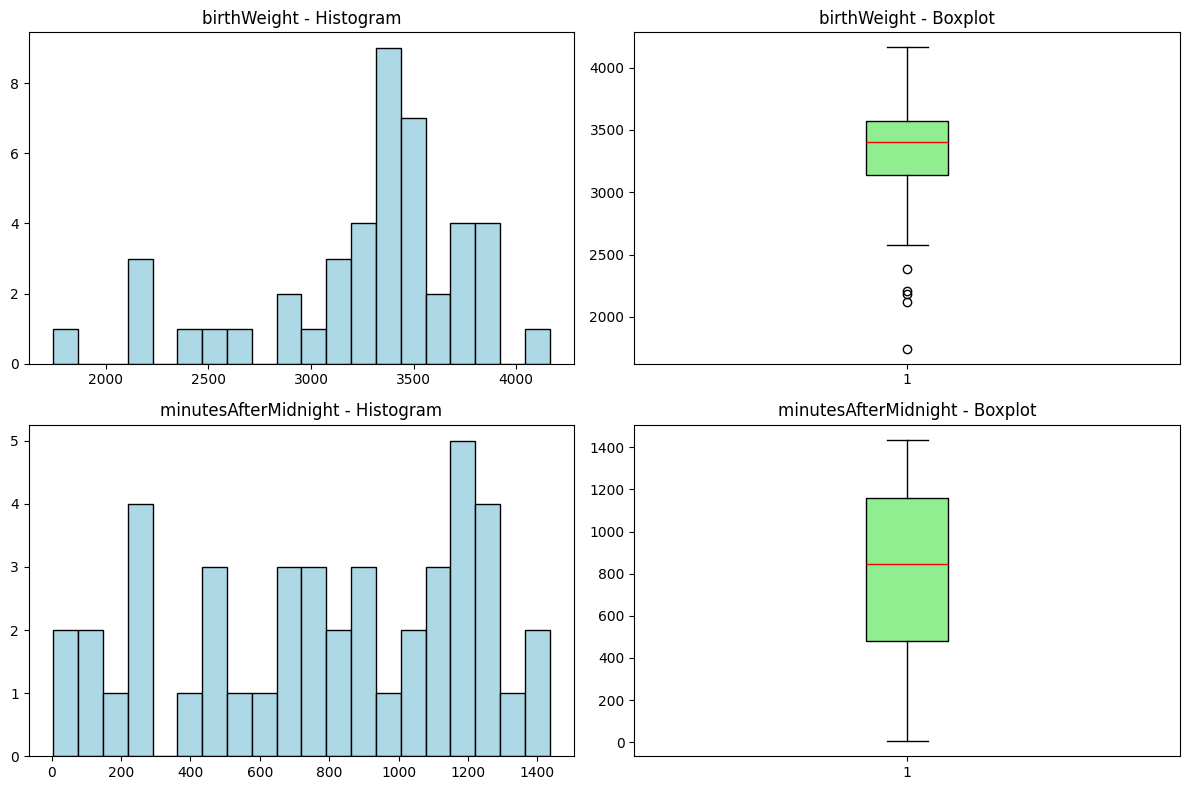

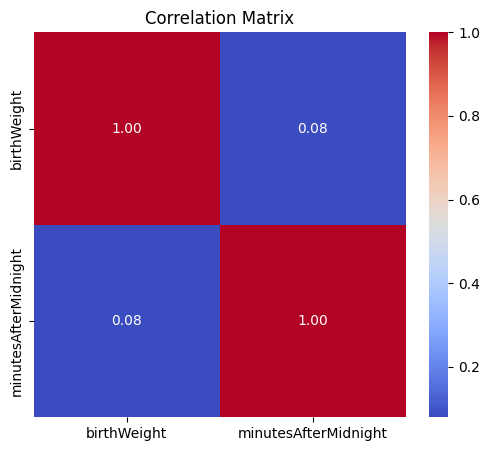

=== Descriptive Statistics ===


,mean,variance,sd,median,q1,q3
birthWeight,3275.954545,278818.276956,528.032458,3404.0,3141.50,3571.75
minutesAfterMidnight,788.727273,173111.691332,416.066931,846.5,482.75,1158.50


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

babyboomData = pd.read_csv("../datasets/babyboom.dat.txt", sep="\s+", header=None, names=[
    "birthWeight", "minutesAfterMidnight"
])

babyboomNumeric = babyboomData[["birthWeight", "minutesAfterMidnight"]]

numVars = babyboomNumeric.columns
numPlots = len(numVars)

fig, axes = plt.subplots(nrows=numPlots, ncols=2, figsize=(12, 4*numPlots))

for i, col in enumerate(numVars):
    axes[i, 0].hist(babyboomNumeric[col], bins=20, color='lightblue', edgecolor='black')
    axes[i, 0].set_title(f'{col} - Histogram')
    
    axes[i, 1].boxplot(babyboomNumeric[col], patch_artist=True,
                       boxprops=dict(facecolor='lightgreen', color='black'),
                       medianprops=dict(color='red'),
                       whiskerprops=dict(color='black'),
                       capprops=dict(color='black'))
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(babyboomNumeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

summaryStats = pd.DataFrame({
    "mean": babyboomNumeric.mean(),
    "variance": babyboomNumeric.var(),
    "sd": babyboomNumeric.std(),
    "median": babyboomNumeric.median(),
    "q1": babyboomNumeric.quantile(0.25),
    "q3": babyboomNumeric.quantile(0.75)
})
print("=== Descriptive Statistics ===")
summaryStats


# Выводы по анализу данных "Babyboom"

## 1. Гистограммы и предположение о распределении

- **birthWeight** (масса при рождении)  
  Гистограмма показывает **левостороннюю асимметрию**, большинство новорождённых имеют массу около 3100–3600 г, но есть и тяжелые дети, а также редкие случаи с очень маленькой массой.  
  > Предположение о распределении: **нормальное скошенное вправо**.  

- **minutesAfterMidnight** (время рождения в минутах после полуночи)  
  Гистограмма показывает, что большинство рождений происходят между 500 и 1100 минут (~8-18 часов), распределение похоже на **равномерное**.  
  > Предположение о распределении: **равномерное**.  

---

## 2. Ящики с усами

- **birthWeight**:  
  - Медиана чуть выше среднего, нижний ус близок к 2600, верхний ус показывает значения выше 4000.  
  - Выбросы соответствуют необычно лёгким новорождённым.  

- **minutesAfterMidnight**:  
  - Медиана около 850, нижний ус на 0, верхний ус на выше 1400, без выбросов.  
  - Распределение слегка скошено влево, большинство значений рассредоточено по временному интервалу.

---

## 3. Описательная статистика

| Переменная             | Среднее   | Дисперсия     | SD       | Медиана | Q1      | Q3      |
|------------------------|-----------|---------------|----------|---------|---------|---------|
| birthWeight            | 3275.95	 | 278818.28	   | 528.03   |	3404.0	| 3141.50 | 3571.75 |
| minutesAfterMidnight   | 788.73	   | 173111.69     | 416.07	  | 846.5	  | 482.75	| 1158.50 |

- Для **birthWeight** большое стандартное отклонение указывает на высокую вариативность масс при рождении.  
- Для **minutesAfterMidnight** значения очень сконцентрированы в начале, но есть редкие более поздние случаи.  
- Медиана и среднее почти совпадают для времени рождения, что связано с дискретным характером переменной.

---

## 4. Попарные коэффициенты корреляции

| Переменные                     | Корреляция |
|--------------------------------|------------|
| birthWeight – minutesAfterMidnight | 0.08     |

- Практически отсутствует линейная связь между массой при рождении и временем рождения.  
- Переменные можно анализировать **почти независимо**.

---
---


**Итог:**  
- Оба распределения имеют **левостороннюю асимметрию**, особенно масса при рождении.  
- Выбросы на боксплотах имеет тоько вес.  
- Корреляция почти отсутствует, что упрощает анализ переменных по отдельности.
